### Update and Explaination 

Nov.18

TO-DOs
- finish the data cleaning process in R, ready to import into python
- the wordcloud on job title
- the basic K-means and LDA clustering on summary

Concerns
- how to determine the optimal k and how to define the clustering type
- do we need to use the clustered word further and calculate the frequency of appearance before prediction



In [2]:
# import general library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/yvonne_zhu/Desktop/ECO421_research project/Data/1118_unique.csv", index_col=0)
df.head()

,job_title,new,company,city,multi,remote,salary,summary,posted_date,posted,avg
1,Finance Assistant,yes,Windigo Contracts LP,Fort William 52,NaN,NaN,$25 - $30 an hour,"Proficient excel and word, particularly with s...",5 days ago,1,27.50
2,customer service representatives supervisor - ...,no,CCUE FINANCE,North York,NaN,NaN,$24 - $27 an hour,Establish work schedules and procedures and co...,16 days ago,1,25.50
3,Assistant Financial Analyst – Entry Level,no,CTAP Canadian Technology Advancement Partners,Markham,NaN,NaN,$18 - $22 an hour,Quick learner – ability to understand the busi...,30+ days ago,1,20.00
4,Finance Director,no,Unisystech Consulting Inc.,Toronto,NaN,NaN,$50 - $52 an hour,Experience: Minimum 5-10 years of finance mana...,30+ days ago,1,51.00
5,Full-time Financial Aid Officer,yes,Algonquin College,Ottawa,NaN,NaN,$32.64 - $37.90 an hour,Student Financial Support (Krista Marsden).\nE...,1 day ago,1,34.95


### Wordcloud

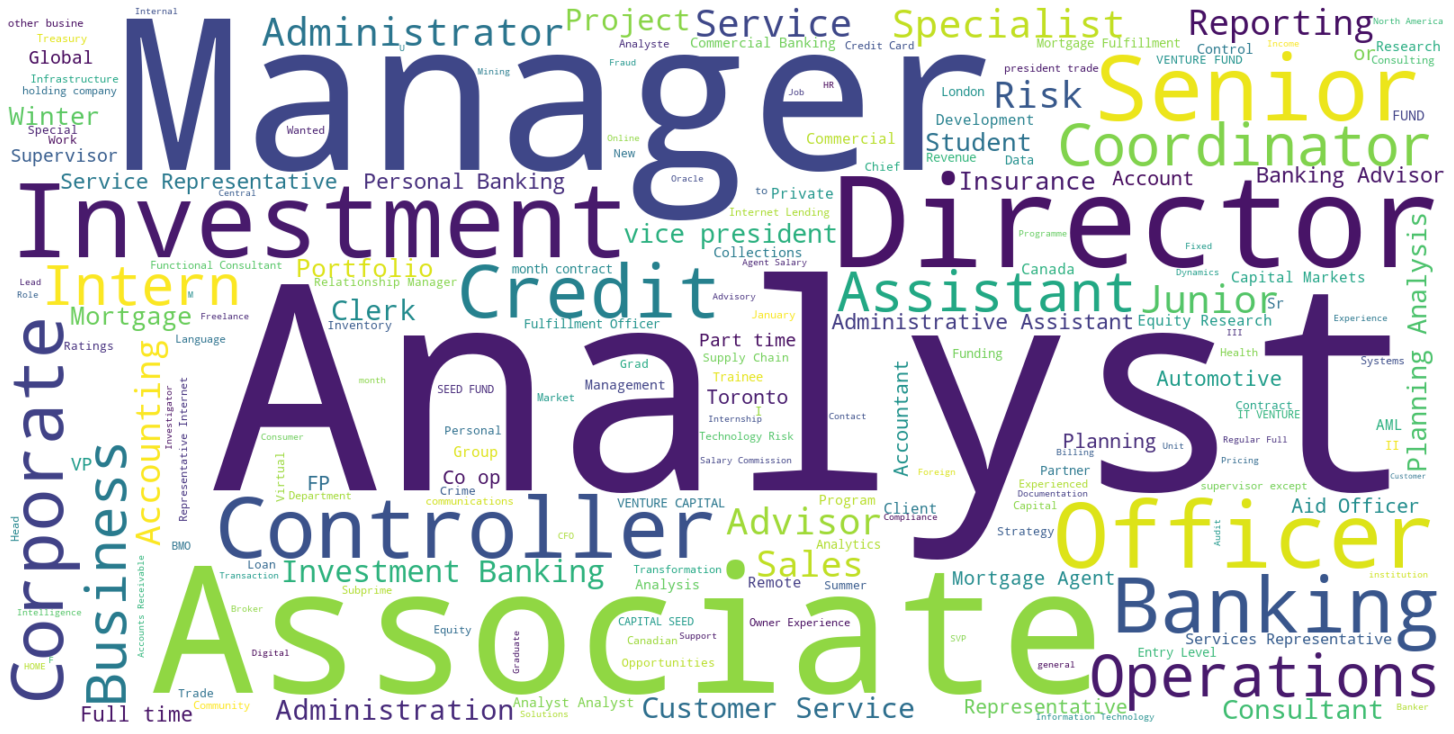

In [4]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

# define the vouge words 
def create_wordcloud(items, stopwords = ["the", "-","Finance","Financial","you","will","in","of","be",
                                        "a","and","with","This","this"]):
    '''create the wordcloud object
    args
    items: the items we need to displat
    stopwords: a list of stopwords we define on our own, filter out tokens
    '''
    
    text = ' '.join(items)
    wordcloud = WordCloud(width=1600,
                         height =800,
                         stopwords=stopwords,
                         background_color="white").generate(text)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    
text = df["job_title"]
create_wordcloud(text)

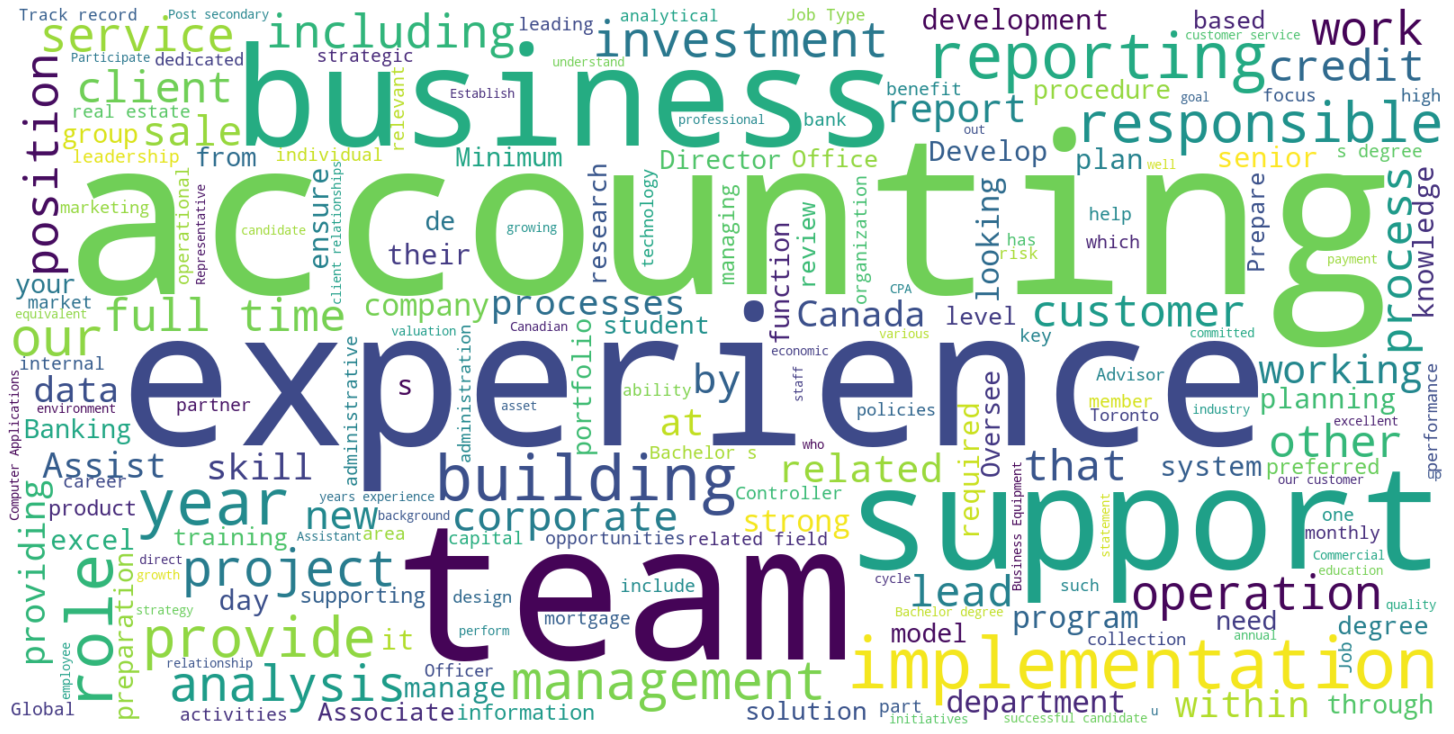

In [5]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

# define the vouge words, more than the previous one since the summary does not need further repeative job title
def summary_wordcloud(items, stopwords = ["the", "-","Finance","Financial","you","will","in","of","be",
                                        "a","and","with","This","this","manager","analyst","or","we","are",
                                         "is","have","an","for", "to","on","as","all"]):
    '''create the wordcloud object
    args
    items: the items we need to displat
    stopwords: a list of stopwords we define on our own, filter out tokens
    '''
    
    text = ' '.join(items)
    wordcloud = WordCloud(width=1600,
                         height =800,
                         stopwords=stopwords,
                         background_color="white").generate(text)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


summary = df["summary"]
summary_wordcloud(summary)

### Final Cleaning on summary

In [6]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
import re

lmtzr = WordNetLemmatizer()

# prepare corpus from the descriptions that dont have stopwords
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.parsing.preprocessing import STOPWORDS
stopwords = STOPWORDS
en_stopwords = stopwords.union(["the","this","it","them","so","finance","financial","are","is","s"])


# define a function to remove the special character and convert into lower case
from string import punctuation
def remove_punctuation_to_lower(s):
    global punctuation
    for p in punctuation:
        s = s.replace(' the ', '')
        s = s.replace(' s ','')
        s = s.replace(p, '')
        s = s.replace('finance','financial')
        s = s.lower()
    return s

# define a function to remove the special character
def remove_special(s):
    return re.sub('[;"?".$%^&*(!\)|]', "", s)

# define a function to remove stopwords from descriptions
def remove_stopwords(s):
    global en_stopwords
    s = word_tokenize(s)
    s = " ".join([w for w in s if w not in en_stopwords])
    return s


In [7]:
# Create a new column of descriptions with no stopwords and remove the punctuation and symbols
df['summary_no_stop'] = df['summary'].map(remove_stopwords)
df['summary_no_stop'] = df['summary_no_stop'].map(remove_punctuation_to_lower)
df['summary_no_stop'] = df['summary_no_stop'].map(remove_special)

In [8]:
# prepare the subset for with salary 

# with salary posted
with_salary = df[df["posted"] == 1]
without_salary = df[df["posted"] == 0]
with_salary.head()

,job_title,new,company,city,multi,remote,salary,summary,posted_date,posted,avg,summary_no_stop
1,Finance Assistant,yes,Windigo Contracts LP,Fort William 52,NaN,NaN,$25 - $30 an hour,"Proficient excel and word, particularly with s...",5 days ago,1,27.50,proficient excel word particularly spreadshee...
2,customer service representatives supervisor - ...,no,CCUE FINANCE,North York,NaN,NaN,$24 - $27 an hour,Establish work schedules and procedures and co...,16 days ago,1,25.50,establish work schedules procedures coordinate...
3,Assistant Financial Analyst – Entry Level,no,CTAP Canadian Technology Advancement Partners,Markham,NaN,NaN,$18 - $22 an hour,Quick learner – ability to understand the busi...,30+ days ago,1,20.00,quick learner – ability understand business pr...
4,Finance Director,no,Unisystech Consulting Inc.,Toronto,NaN,NaN,$50 - $52 an hour,Experience: Minimum 5-10 years of finance mana...,30+ days ago,1,51.00,experience minimum 510 years management exper...
5,Full-time Financial Aid Officer,yes,Algonquin College,Ottawa,NaN,NaN,$32.64 - $37.90 an hour,Student Financial Support (Krista Marsden).\nE...,1 day ago,1,34.95,student financial support krista marsden em...


### Top Words Frequency

In [9]:
corpus = " ".join(with_salary['summary_no_stop'].tolist())

tokenized_corpus = nltk.word_tokenize(corpus)

# lemmatize these tokens
lemmatized_tokens = [lmtzr.lemmatize(token) for token in tokenized_corpus]

# word frequencies for the lemmatized tokens
fd = nltk.FreqDist(lemmatized_tokens)

# get the top words
top_words = []
for key, value in fd.items():
    top_words.append((key, value))

# sort the list by the top frequencies
top_words = sorted(top_words, key = lambda x:x[1], reverse = True)

# keep top 10 words only
top_words = top_words[:20]
top_words

[('financial', 62),
 ('accounting', 54),
 ('business', 39),
 ('experience', 38),
 ('work', 36),
 ('implementation', 35),
 ('prepare', 34),
 ('oversee', 33),
 ('policy', 32),
 ('service', 31),
 ('building', 30),
 ('report', 29),
 ('process', 28),
 ('team', 28),
 ('’', 27),
 ('application', 26),
 ('year', 25),
 ('procedure', 24),
 ('customer', 24),
 ('credit', 24)]

### Word Pattern
#### as reference: 
Nouns (NN), plural nouns (NNS), adjectives (JJ), Pronouns (IN) and Determiners (DT), present tense (VBP), verb gerund (judging) (VBG)

#### finding: with (VBP > VBG) and without salary (VBG > VBP) posted have same ranking difference between VBG, VBP


In [10]:
# to define the pattern in the summary for whole data
nltk.download('averaged_perceptron_tagger')
corpus_pattern = " ".join(df['summary_no_stop'].tolist())

# This is the NLTK function that breaks a string down to its tokens
tokens = word_tokenize(corpus_pattern)

# Get the parts of speech tag for all words
answer = nltk.pos_tag(tokens)
answer_pos = [a[1] for a in answer]

# print a value count for the parts of speech
all_pos = pd.Series(answer_pos)
all_pos.value_counts().head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yvonne_zhu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


NN     5805
JJ     2713
NNS    2068
VBG     986
VBP     828
dtype: int64

In [11]:
# detect the pattern for with salary posted
corpus_pattern2 = " ".join(with_salary['summary_no_stop'].tolist())

# This is the NLTK function that breaks a string down to its tokens
tokens2 = word_tokenize(corpus_pattern2)

# Get the parts of speech tag for all words
answer2 = nltk.pos_tag(tokens2)
answer_pos2 = [a[1] for a in answer2]

# print a value count for the parts of speech
all_pos2 = pd.Series(answer_pos2)
all_pos2.value_counts().head()

NN     1643
JJ      789
NNS     715
VBG     289
VBP     287
dtype: int64

In [12]:
# detect the pattern for without salary posted
corpus_pattern3 = " ".join(without_salary['summary_no_stop'].tolist())

# This is the NLTK function that breaks a string down to its tokens
tokens3 = word_tokenize(corpus_pattern3)

# Get the parts of speech tag for all words
answer3 = nltk.pos_tag(tokens3)
answer_pos3 = [a[1] for a in answer3]

# print a value count for the parts of speech
all_pos3 = pd.Series(answer_pos3)
all_pos3.value_counts().head()

NN     4162
JJ     1924
NNS    1353
VBG     697
VBP     541
dtype: int64

### Topic Clustering using K-means

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = with_salary["summary"]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 work
 building
 implementation
 support
 time
 financial
 services
 ordinate
 management
 review
Cluster 1:
 finance
 accounting
 experience
 years
 team
 implementation
 minimum
 processes
 reporting
 financial
Cluster 2:
 financial
 oversee
 prepare
 policies
 implement
 equipment
 applications
 preparation
 computer
 reports
Cluster 3:
 analyst
 financial
 sales
 role
 credit
 responsible
 client
 customer
 operations
 service
Cluster 4:
 degree
 finance
 bachelor
 field
 accounting
 business
 related
 preferred
 similar
 post


In [22]:
documents2 = without_salary["summary"]

vectorizer2 = TfidfVectorizer(stop_words='english')
X = vectorizer2.fit_transform(documents)

true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 financial
 finance
 time
 analyst
 credit
 support
 position
 role
 responsible
 job
Cluster 1:
 team
 implementation
 process
 processes
 finance
 opportunities
 sales
 development
 building
 systems
Cluster 2:
 work
 allocate
 material
 human
 resources
 organizational
 programs
 equipment
 ordinate
 computer
Cluster 3:
 oversee
 financial
 prepare
 preparation
 reports
 data
 collection
 analysis
 balance
 books
Cluster 4:
 accounting
 finance
 experience
 degree
 years
 bachelor
 minimum
 field
 building
 required


### LDA model

In [14]:
# Preprocessing
# ! pip install gensim
import string
import nltk
# nltk.download('wordnet')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# Stopwords
stop = STOPWORDS
# stop = stop.union(['said','im','person'])

# Punctuation
punct = set(string.punctuation)
punct.update(['"','``'])

# stemmer/lemmatizer

lemma = WordNetLemmatizer()
ps = PorterStemmer()

def clean(doc, method):
    numb_free=''.join([i for i in doc if not i.isdigit()])
    punc_free=''.join([i for i in numb_free if i not in punct])
    stop_free=" ".join([i for i in punc_free.lower().split() if i not in stop])
    if method=='lemma':
        normalize=[lemma.lemmatize(word) for word in stop_free.split()]
    elif method=='porter':
        normalize=[ps.stem(word) for word in stop_free.split()]
    else:
        print('Only "lemma" or "porter" available')
        return
    final=" ".join([word for word in normalize if len(word)!=1])
    return(final)

# Clean each article, and return as *list* of clean words
# (this is why we use .split())

# total with and without salary posted
clean_doc=[clean(t,'lemma').split() for t in df['summary']]

# with salary posted
clean_doc2=[clean(t,'lemma').split() for t in with_salary['summary']]

In [15]:
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary

# for total data 
bigram = Phrases(clean_doc, min_count=5, threshold=20) # Generates a model
trigram = Phrases(bigram[clean_doc], min_count=5, threshold=20)

bigram_model = Phraser(bigram) # Stores model in an easier to use way
trigram_model = Phraser(trigram)

# Find all trigrams based on model above
norm_corpus_trigrams=[trigram_model[bigram_model[doc]] for doc in clean_doc]

# The list of all unique words (including trigrams) in the corpus
dictionary = Dictionary(norm_corpus_trigrams)
dictionary.filter_extremes(no_below=20, no_above=0.99)

# Looking only at words in dictionary, create bag-of-words for each article
# we limit the words left in the dictionary
bow_corpus = [dictionary.doc2bow(trigram_model[bigram_model[doc]]) for doc in clean_doc]

# show the first 10 top words appeared in the dict 
[(dictionary[word],freq) for word, freq in bow_corpus[1][:10]]

[('department', 1), ('prepare', 1), ('work', 2)]

#### the above code is mainly used for Navie Bayes Classifier, salary prediction, the results are roughly the same as the chunk above

In [16]:
# for job with salary posted 
# for total data 
bigram2 = Phrases(clean_doc2, min_count=5, threshold=20) # Generates a model
trigram2 = Phrases(bigram[clean_doc2], min_count=5, threshold=20)

bigram_model2 = Phraser(bigram) # Stores model in an easier to use way
trigram_model2 = Phraser(trigram)

# Find all trigrams based on model above
norm_corpus_trigrams2=[trigram_model2[bigram_model2[doc]] for doc in clean_doc2]

# The list of all unique words (including trigrams) in the corpus
dictionary2 = Dictionary(norm_corpus_trigrams2)
dictionary2.filter_extremes(no_below=20, no_above=0.99)

# Looking only at words in dictionary, create bag-of-words for each article
# we limit the words left in the dictionary
bow_corpus2 = [dictionary2.doc2bow(trigram_model2[bigram_model2[doc]]) for doc in clean_doc2]

# show the first 10 top words appeared in the dict 
# [(dictionary2[word],freq) for word, freq in bow_corpus2[1][:10]]

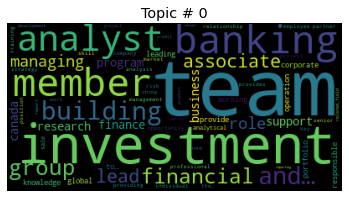

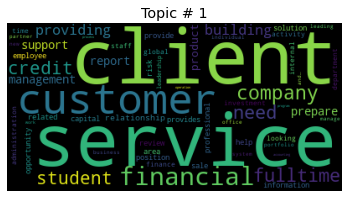

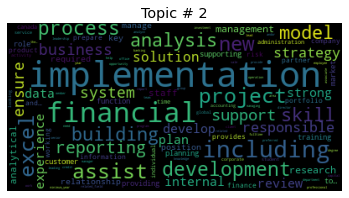

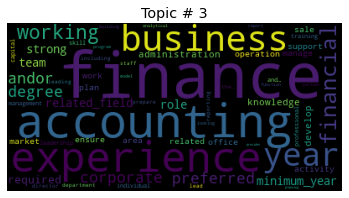

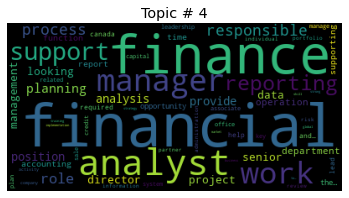

In [20]:
# for total job posting

from gensim.models import LdaModel

K = 5 # select the topic we want it to find 

lda_model=LdaModel(corpus=bow_corpus, id2word=dictionary,chunksize=1700,
                   random_state=42,iterations=50,num_topics=K,passes=20) # use the bag of words corpus

import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(K):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t,200))))
    plt.axis('off')
    plt.title('Topic # '+str(t))

In [18]:
from gensim.models import CoherenceModel

cv_coherence1 = CoherenceModel(model=lda_model,corpus=bow_corpus,
                                      texts=norm_corpus_trigrams,
                                      dictionary=dictionary,coherence='c_v')
avg_coherence = cv_coherence1.get_coherence()

avg_coherence

0.2693341246800136

### Currently, skip the process of selecting K 

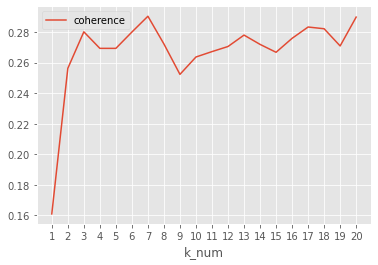

In [27]:
# test for the optimal K
from gensim.models import LdaModel
from gensim.models import CoherenceModel

k_list = range(1,21)
coherence = []

for K in k_list: 
    lda_model_K = LdaModel(corpus=bow_corpus, id2word=dictionary, chunksize=1700,
                   random_state=42, iterations=50, num_topics=K, passes=20) 

    cv_coherence_K = CoherenceModel(model=lda_model_K,corpus=bow_corpus,
                                      texts=norm_corpus_trigrams,
                                      dictionary=dictionary,coherence='c_v')
    avg_coherence_K = cv_coherence_K.get_coherence()
    coherence.append(avg_coherence_K)

    
# visualize the score of different plot to select the optimal K
df_visual = pd.DataFrame(list(zip(coherence, k_list)), columns =['coherence','k_num']) 

ax = plt.gca()
df_visual.plot(kind='line', x='k_num',y='coherence',ax=ax)
plt.xticks(np.arange(1, 21, 1))
plt.show()

### We observe some differences in the topics

<ipython-input-21-7b9d930c6334>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fake_news=np.array(clean_doc)[df['posted']==1] # with salary posted
<ipython-input-21-7b9d930c6334>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  real_news=np.array(clean_doc)[df['posted']==0] # without salary posted


<BarContainer object of 5 artists>

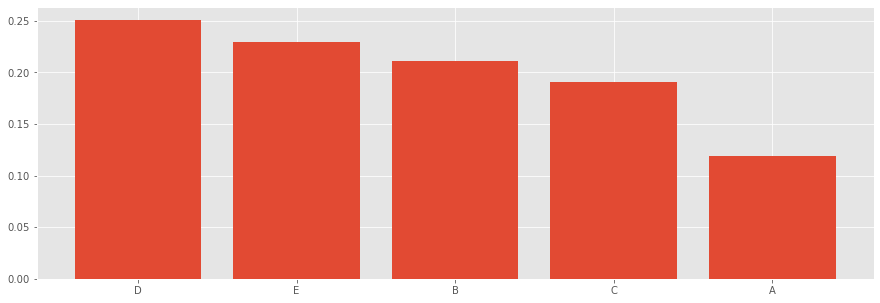

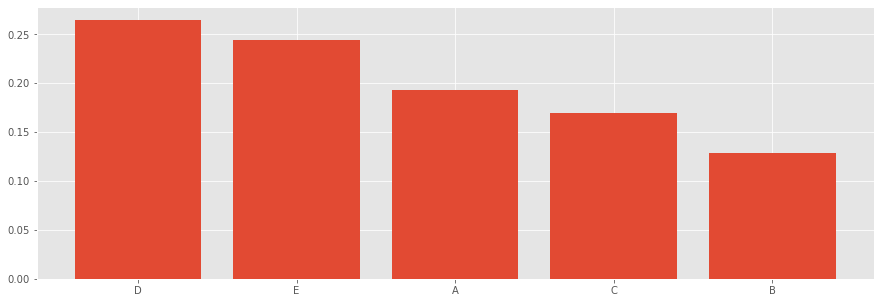

In [21]:
# compare job posting with and without salary 
topics = ["A","B","C","D","E"]

fake_news=np.array(clean_doc)[df['posted']==1] # with salary posted
real_news=np.array(clean_doc)[df['posted']==0] # without salary posted

fake_news_comb=[word for doc in fake_news for word in doc]
real_news_comb=[word for doc in real_news for word in doc]

bow_corpus_fake=dictionary.doc2bow(trigram_model[bigram_model[fake_news_comb]])
bow_corpus_real=dictionary.doc2bow(trigram_model[bigram_model[real_news_comb]])

topics_fake=lda_model[bow_corpus_fake]
topics_real=lda_model[bow_corpus_real]

topics1=np.array(topics)

topics_fake=pd.DataFrame(topics_fake).sort_values(by=1,ascending=False)
topics_fake['name']=topics1[np.array(topics_fake[0])]

topics_real=pd.DataFrame(topics_real).sort_values(by=1,ascending=False)
topics_real['name']=topics1[np.array(topics_real[0])]

plt.figure(figsize=(15,5))
plt.bar(topics_fake['name'],topics_fake[1])

plt.figure(figsize=(15,5))
plt.bar(topics_real['name'],topics_real[1])

### Build the classifier, compare Logistics classifier, Navie Bayes, and Decision Tree
#### First, classify on whether job salary will be posted 

In [29]:
# decision tree
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform([" ".join(text) for text in norm_corpus_trigrams])
X2 = X.toarray()

X2 = pd.DataFrame(X2, columns = vectorizer.get_feature_names())

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

dt = DecisionTreeClassifier()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X2, df["posted"])

dt.fit(x_train,y_train)

dt.score(x_test,y_test)

imp = pd.DataFrame({'feature':X2.columns,'importance':dt.feature_importances_}).sort_values(by='importance',ascending=False)
imp

,feature,importance
2310,support,0.024968
329,business_equipment_application,0.022527
1713,oversee_preparation_report_oversee,0.021998
147,application,0.021082
94,agreement,0.020023
...,...,...
891,europe,0.000000
892,european,0.000000
895,event,0.000000
896,every,0.000000


In [33]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = dt.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7461538461538462

### Navie Bayes using summary to predict the salary
#### !!! Haven't standarize the avg data 

In [21]:
with_salary['target'] = np.where(with_salary['avg'] >= 26.757326, 1, 0)
with_salary.head()

<ipython-input-21-3b3a99dfc69a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_salary['target'] = np.where(with_salary['avg'] >= 26.757326, 1, 0)


,job_title,new,company,city,multi,remote,salary,summary,posted_date,posted,avg,summary_no_stop,target
1,Finance Assistant,yes,Windigo Contracts LP,Fort William 52,NaN,NaN,$25 - $30 an hour,"Proficient excel and word, particularly with s...",5 days ago,1,27.50,proficient excel word particularly spreadshee...,1
2,customer service representatives supervisor - ...,no,CCUE FINANCE,North York,NaN,NaN,$24 - $27 an hour,Establish work schedules and procedures and co...,16 days ago,1,25.50,establish work schedules procedures coordinate...,0
3,Assistant Financial Analyst – Entry Level,no,CTAP Canadian Technology Advancement Partners,Markham,NaN,NaN,$18 - $22 an hour,Quick learner – ability to understand the busi...,30+ days ago,1,20.00,quick learner – ability understand business pr...,0
4,Finance Director,no,Unisystech Consulting Inc.,Toronto,NaN,NaN,$50 - $52 an hour,Experience: Minimum 5-10 years of finance mana...,30+ days ago,1,51.00,experience minimum 510 years management exper...,1
5,Full-time Financial Aid Officer,yes,Algonquin College,Ottawa,NaN,NaN,$32.64 - $37.90 an hour,Student Financial Support (Krista Marsden).\nE...,1 day ago,1,34.95,student financial support krista marsden em...,1


#### - Predict using anything but summary

In [22]:
columns_required = ['job_title', 'company', 'city', 'multi', 'remote', 'posted','target']
train_b1 = with_salary.loc[:, columns_required]

# Convert the categorical variables to dummy variables
train_b1 = pd.get_dummies(train_b1)

# Lets separate the predictors from the target variable
columns_selected = train_b1.columns.values.tolist()
target_variable = ['target']

# predictors are all variables except for the target variable
predictors = list(set(columns_selected) - set(target_variable))

# setup the model
from sklearn.naive_bayes import BernoulliNB

X = np.array(train_b1.loc[:,predictors])
y = np.array(train_b1.loc[:,target_variable[0]])

# create test train splits 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

model = BernoulliNB()

# Fit the model and predict the output on the test data
model.fit(X_train, y_train)

# Predicted output
predicted = model.predict(X_test)

# Accuracy
from sklearn import metrics

print("Model Accuracy is:", metrics.accuracy_score(y_test, predicted))
print("Area under the ROC curve:", metrics.roc_auc_score(y_test, predicted))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, predicted))

Model Accuracy is: 0.6349206349206349
Area under the ROC curve: 0.6376008064516129
Confusion Matrix:
 [[25  6]
 [17 15]]


#### - Predict based on summary 

In [23]:
def text_lemmatizer(s):
    '''Given a description, this lemmatizes it'''
    tokenized_corpus = nltk.word_tokenize(s)
    
    # lemmatize
    s = " ".join([lmtzr.lemmatize(token) for token in tokenized_corpus])
    return s

# lemmatize the descriptions
with_salary['summary_no_stop_lemm'] = with_salary['summary_no_stop'].map(text_lemmatizer)

# make the X and y matrices for model fitting
X = np.array(with_salary.loc[:, 'summary_no_stop_lemm'])
y = np.array(with_salary.loc[:, 'target'])
 
# split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Convert the arrays into a presence/absence matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
nb_mult_model = MultinomialNB().fit(X_train_counts, y_train)
predicted = nb_mult_model.predict(X_test_counts)

print("Model Accuracy:", metrics.accuracy_score(y_test, predicted))
print("Area under the ROC curve:", metrics.roc_auc_score(y_test, predicted))
print("Model Confusion Matrix:\n", metrics.confusion_matrix(y_test, predicted))

Model Accuracy: 0.6984126984126984
Area under the ROC curve: 0.6985887096774195
Model Confusion Matrix:
 [[22  9]
 [10 22]]


<ipython-input-23-0910b5555dde>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_salary['summary_no_stop_lemm'] = with_salary['summary_no_stop'].map(text_lemmatizer)


### Detect words indicating high and low salary 

In [24]:
# extract the column names for the columns in our training dataset.
column_names = [x for (x,y) in sorted(count_vectorizer.vocabulary_.items(), key = lambda x:x[1])]

# probability of high salary
p_1 = np.mean(y_train)

# probability of low salary
p_0 = 1 - p_1


# Calculate the frequencies of words using the TfidfTransformer
X_train_bern = np.where(X_train_counts.todense() > 0 , 1, 0)
X_test_bern = np.where(X_test_counts.todense() > 0, 1, 0)

# create an array of feature vectors
feature_vectors = np.array(X_train_bern)

# probability of word appearance
word_probabilities = np.mean(feature_vectors, axis = 0)

# probability of seeing these words for class= 1 and class = 0 respectively
p_x_1 = np.mean(feature_vectors[y_train==1, :], axis = 0)
p_x_0 = np.mean(feature_vectors[y_train==0, :], axis = 0)

# words that are good indicators of high salary (class = 1)
high_indicators = p_x_1 * (np.log2(p_x_1) - np.log2(word_probabilities) - np.log2(p_1))

high_indicators_series = pd.Series(high_indicators, index = column_names)

# words that are good indicators of low salary (class = 0)
low_indicators = p_x_0 * (np.log2(p_x_0) - np.log2(word_probabilities) - np.log2(p_0))

low_indicators_series = pd.Series(low_indicators, index = column_names)

<ipython-input-24-a34fd8f3c153>:26: RuntimeWarning: divide by zero encountered in log2
  high_indicators = p_x_1 * (np.log2(p_x_1) - np.log2(word_probabilities) - np.log2(p_1))
<ipython-input-24-a34fd8f3c153>:26: RuntimeWarning: invalid value encountered in multiply
  high_indicators = p_x_1 * (np.log2(p_x_1) - np.log2(word_probabilities) - np.log2(p_1))
<ipython-input-24-a34fd8f3c153>:31: RuntimeWarning: divide by zero encountered in log2
  low_indicators = p_x_0 * (np.log2(p_x_0) - np.log2(word_probabilities) - np.log2(p_0))
<ipython-input-24-a34fd8f3c153>:31: RuntimeWarning: invalid value encountered in multiply
  low_indicators = p_x_0 * (np.log2(p_x_0) - np.log2(word_probabilities) - np.log2(p_0))


In [25]:
low_indicators_series[[i for i in low_indicators_series.index if i not in en_stopwords]].sort_values(ascending = False)[:20].index

Index(['accounting', 'service', 'prepare', 'experience', 'year', 'maintain',
       'book', 'role', 'customer', 'degree', 'statement', 'balance', 'trial',
       'business', 'building', 'skill', 'position', 'calculate', 'based',
       'week'],
      dtype='object')

In [26]:
high_indicators_series[[i for i in high_indicators_series.index if i not in en_stopwords]].sort_values(ascending = False)[:20].index

Index(['implement', 'oversee', 'policy', 'report', 'analysis', 'preparation',
       'data', 'procedure', 'collection', 'establish', 'plan', 'human',
       'resource', 'staff', 'knowledge', 'allocate', 'material', 'team',
       'business', 'implementation'],
      dtype='object')